# Example cohort navigation
* Note use of FHIR Terminology Service below

## [binder](https://mybinder.org/v2/gh/hsolbrig/clinicalprofileexamples/master?filepath=examples%2FVisualization.ipynb)

In [6]:
pip install jsonasobj

pip install requests

pip install numpy

pip install pandas

pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Conversion from lab code to lab name

In [1]:
from base64 import b64encode
from functools import lru_cache
from typing import Optional

import requests
from jsonasobj import loads, JsonObj


def map_parameters(struct) -> Optional[JsonObj]:
    if struct.resourceType == "Parameters":
        rval = JsonObj()
        for p in struct.parameter:
            if hasattr(p, 'valueString'):
                rval[p.name] = p.valueString
            elif hasattr(p, 'part'):
                rval[p.name] = p.part
            else:
                pass
        return rval
    return None


@lru_cache()
def loinc_name_for(code: str) -> str:
    userAndPass = b64encode(b"hsolbrig:instill-geminate-tehran").decode("ascii")
    headers = {'Authorization': 'Basic %s' % userAndPass}
    resp = requests.get(f"https://fhir.loinc.org/CodeSystem/$lookup?system=http://loinc.org&code={code}", headers=headers)
    if resp.status_code == 200:
        vals = map_parameters(loads(resp.text))
        if vals:
            return vals.display
        else:
            return "Unknown Code"

In [2]:
from jsonasobj import loads
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as plot

In [3]:
resp = requests.get("http://hapi.clinicalprofiles.org/baseR4/ClinicalProfile/eds-All-All-All")
if resp.status_code  == 200:
    base = loads(resp.text)
resp = requests.get("http://hapi.clinicalprofiles.org/baseR4/ClinicalProfile/eds-All-All-10-19")
if resp.status_code == 200:
    var = loads(resp.text)

In [4]:
v1 = var.lab[0].scalarDistribution.decile
df1 = pd.DataFrame(np.array([[v1[0].nth, v1[0].value]]), columns=['nth', 'value'])
for v in v1:
    df = pd.DataFrame(np.array([[v.nth, v.value]]), columns=['nth', 'value'])
    df1 = pd.concat([df1, df])
df1 = df1.reset_index(drop=True)
df1 = df1.drop(0)
df1

,nth,value
1,10.0,5.300
2,20.0,6.800
3,30.0,8.125
4,40.0,9.300
5,50.0,9.875
6,60.0,10.200
7,70.0,11.975
8,80.0,14.850
9,90.0,17.325


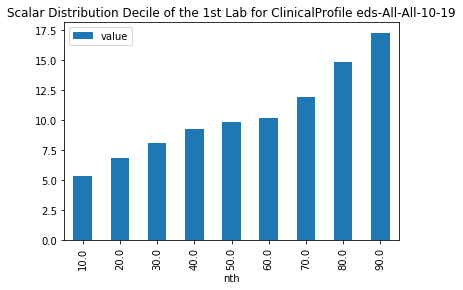

In [5]:
df1.plot(x='nth', y='value', kind='bar', title='Scalar Distribution Decile of the 1st Lab for ClinicalProfile eds-All-All-10-19')

In [6]:
df2 = pd.DataFrame(np.array([[var.lab[0].scalarDistribution.max, 
                             var.lab[0].scalarDistribution.min,
                             var.lab[0].scalarDistribution.median,
                             var.lab[0].scalarDistribution.mean,
                             var.lab[0].scalarDistribution.stdDev]]),
                  columns = ['max', 'min', 'median', 'mean', 'stdDev'])
lab_code = pd.DataFrame(np.array([[var.lab[0].code[0].coding[0].code]]),
                       columns = ['lab_code'])

for lab in var.lab:
        df = pd.DataFrame(np.array([[lab.scalarDistribution.max,
                                    lab.scalarDistribution.min,
                                    lab.scalarDistribution.median,
                                    lab.scalarDistribution.mean,
                                    lab.scalarDistribution.stdDev]]),
                         columns = ['max', 'min', 'median', 'mean', 'stdDev'])
        df2 = pd.concat([df2, df])
        code = pd.DataFrame(np.array([[lab.code[0].coding[0].code]]),
                           columns = ['lab_code'])
        lab_code = pd.concat([lab_code, code])
df2 = df2.reset_index(drop=True)
df2 = df2.drop(0)
lab_code = lab_code.reset_index(drop=True)
lab_code = lab_code.drop(0)
df2 = df2[df2 > 0]
to_drop = df2[df2.isna().any(axis=1)].index
df2 = df2.drop(to_drop)
lab_code = lab_code.drop(to_drop)
df2 = pd.concat([lab_code, df2], axis = 1)
df2 = df2.reset_index(drop=True)
df2

,lab_code,max,min,median,mean,stdDev
0,12962-7,33.00,2.00,9.500,10.880,3.837
1,1742-6,180.00,6.00,15.000,18.560,9.575
2,17861-6,10.70,7.20,9.250,9.276,0.117
3,19123-9,2.50,1.60,2.000,2.021,0.065
4,1920-8,70.00,7.00,18.000,19.204,3.422
5,1975-2,2.30,0.20,0.325,0.436,0.088
6,2085-9,74.00,40.00,50.500,53.274,2.338
7,2093-3,254.00,97.00,171.000,176.406,8.519
8,21582-2,9.00,2.00,3.850,4.000,1.525
9,2339-0,153.00,68.00,100.000,103.323,3.075


In [7]:
lab_name = pd.DataFrame([[np.array(loinc_name_for(df2['lab_code'][0]))]], columns = ['lab_name'])
for i in df2['lab_code']:
    ln = pd.DataFrame([[np.array(loinc_name_for(i))]], columns = ['lab_name'])
    lab_name = pd.concat([lab_name, ln])
lab_name = lab_name.reset_index(drop=True)
lab_name = lab_name.drop(0)
lab_name = lab_name.reset_index(drop=True)
df2 = pd.concat([lab_name, df2], axis = 1)
df2

,lab_name,lab_code,max,min,median,mean,stdDev
0,Urea nitrogen [Mass/volume] in Venous blood,12962-7,33.00,2.00,9.500,10.880,3.837
1,Alanine aminotransferase [Enzymatic activity/v...,1742-6,180.00,6.00,15.000,18.560,9.575
2,Calcium [Mass/volume] in Serum or Plasma,17861-6,10.70,7.20,9.250,9.276,0.117
3,Magnesium [Mass/volume] in Serum or Plasma,19123-9,2.50,1.60,2.000,2.021,0.065
4,Aspartate aminotransferase [Enzymatic activity...,1920-8,70.00,7.00,18.000,19.204,3.422
5,Bilirubin.total [Mass/volume] in Serum or Plasma,1975-2,2.30,0.20,0.325,0.436,0.088
6,Cholesterol in HDL [Mass/volume] in Serum or P...,2085-9,74.00,40.00,50.500,53.274,2.338
7,Cholesterol [Mass/volume] in Serum or Plasma,2093-3,254.00,97.00,171.000,176.406,8.519
8,Tryptase [Mass/volume] in Serum or Plasma,21582-2,9.00,2.00,3.850,4.000,1.525
9,Glucose [Mass/volume] in Blood,2339-0,153.00,68.00,100.000,103.323,3.075


Text(0.5, 1.0, 'Scalar Distribution of Labs for ClinicalProfile eds-All-All-10-19')

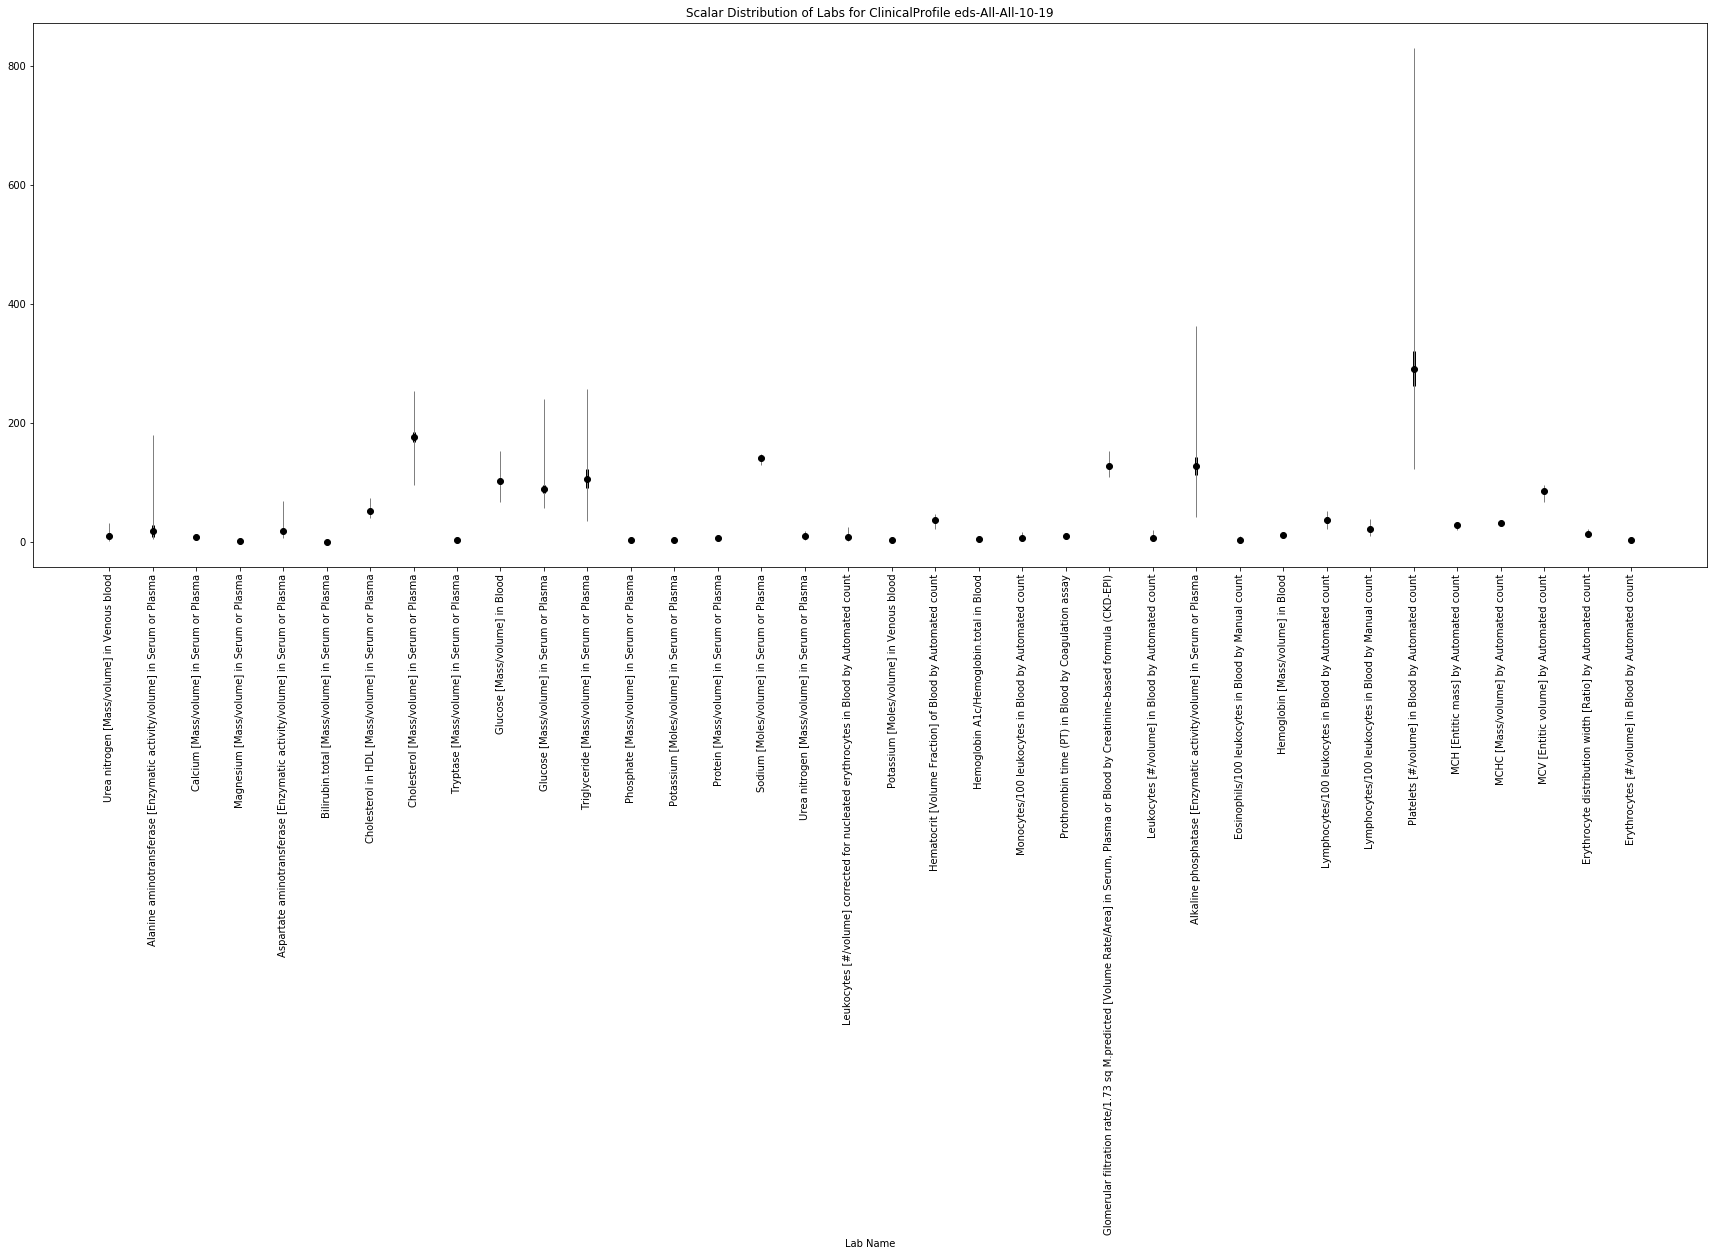

In [8]:
plt.figure(figsize=(30, 10))
plt.errorbar(np.arange(len(df2['lab_name'])), df2['mean'], df2['stdDev'], fmt='ok', lw=3)
plt.errorbar(np.arange(len(df2['lab_name'])), df2['mean'], [df2['mean'] - df2['min'], df2['max'] - df2['mean']],
             fmt='.k', ecolor='gray', lw=1)
plt.xticks(np.arange(len(df2['lab_name'])), df2['lab_name'], rotation=90)
plt.xlabel('Lab Name')
plt.title('Scalar Distribution of Labs for ClinicalProfile eds-All-All-10-19')

In [9]:
df3 = pd.DataFrame(np.array([[base.lab[0].scalarDistribution.max, 
                             base.lab[0].scalarDistribution.min,
                             base.lab[0].scalarDistribution.median,
                             base.lab[0].scalarDistribution.mean,
                             base.lab[0].scalarDistribution.stdDev]]),
                  columns = ['max_base', 'min_base', 'median_base', 'mean_base', 'stdDev_base'])
lab_code = pd.DataFrame(np.array([[base.lab[0].code[0].coding[0].code]]),
                       columns = ['lab_code'])

for lab in base.lab:
        df = pd.DataFrame(np.array([[lab.scalarDistribution.max,
                                    lab.scalarDistribution.min,
                                    lab.scalarDistribution.median,
                                    lab.scalarDistribution.mean,
                                    lab.scalarDistribution.stdDev]]),
                         columns = ['max_base', 'min_base', 'median_base', 'mean_base', 'stdDev_base'])
        df3 = pd.concat([df3, df])
        code = pd.DataFrame(np.array([[lab.code[0].coding[0].code]]),
                           columns = ['lab_code'])
        lab_code = pd.concat([lab_code, code])
df3 = df3.reset_index(drop=True)
df3 = df3.drop(0)
lab_code = lab_code.reset_index(drop=True)
lab_code = lab_code.drop(0)
df3 = df3[df3 > 0]
to_drop = df3[df3.isna().any(axis=1)].index
df3 = df3.drop(to_drop)
lab_code = lab_code.drop(to_drop)
df3 = pd.concat([lab_code, df3], axis = 1)
df3 = df3.reset_index(drop=True)
df3
#df3 = pd.concat([df3, df2], axis = 1)
df2 = df2.drop('lab_name', 1)
df4 = pd.merge(df3, df2, on='lab_code')
df4

,lab_code,max_base,min_base,median_base,mean_base,stdDev_base,max,min,median,mean,stdDev
0,12962-7,70.00,1.00,11.000,11.976,0.868,33.00,2.00,9.500,10.880,3.837
1,1742-6,896.00,4.00,17.500,28.116,27.990,180.00,6.00,15.000,18.560,9.575
2,17861-6,11.40,4.90,9.100,9.010,0.144,10.70,7.20,9.250,9.276,0.117
3,19123-9,8.40,1.20,2.000,2.083,0.175,2.50,1.60,2.000,2.021,0.065
4,1920-8,1203.00,6.00,19.000,26.077,32.782,70.00,7.00,18.000,19.204,3.422
5,1975-2,4.20,0.10,0.400,0.436,0.109,2.30,0.20,0.325,0.436,0.088
6,2085-9,109.00,18.00,58.000,57.957,1.441,74.00,40.00,50.500,53.274,2.338
7,2093-3,349.00,74.00,178.750,185.627,3.630,254.00,97.00,171.000,176.406,8.519
8,21582-2,17.00,1.00,4.000,4.817,1.723,9.00,2.00,3.850,4.000,1.525
9,2339-0,445.00,54.00,95.000,105.754,34.918,153.00,68.00,100.000,103.323,3.075


In [10]:
lab_name = pd.DataFrame([[np.array(loinc_name_for(df4['lab_code'][0]))]], columns = ['lab_name'])
for i in df4['lab_code']:
    ln = pd.DataFrame([[np.array(loinc_name_for(i))]], columns = ['lab_name'])
    lab_name = pd.concat([lab_name, ln])
lab_name = lab_name.reset_index(drop=True)
lab_name = lab_name.drop(0)
lab_name = lab_name.reset_index(drop=True)
df4 = pd.concat([lab_name, df4], axis = 1)
df4

,lab_name,lab_code,max_base,min_base,median_base,mean_base,stdDev_base,max,min,median,mean,stdDev
0,Urea nitrogen [Mass/volume] in Venous blood,12962-7,70.00,1.00,11.000,11.976,0.868,33.00,2.00,9.500,10.880,3.837
1,Alanine aminotransferase [Enzymatic activity/v...,1742-6,896.00,4.00,17.500,28.116,27.990,180.00,6.00,15.000,18.560,9.575
2,Calcium [Mass/volume] in Serum or Plasma,17861-6,11.40,4.90,9.100,9.010,0.144,10.70,7.20,9.250,9.276,0.117
3,Magnesium [Mass/volume] in Serum or Plasma,19123-9,8.40,1.20,2.000,2.083,0.175,2.50,1.60,2.000,2.021,0.065
4,Aspartate aminotransferase [Enzymatic activity...,1920-8,1203.00,6.00,19.000,26.077,32.782,70.00,7.00,18.000,19.204,3.422
5,Bilirubin.total [Mass/volume] in Serum or Plasma,1975-2,4.20,0.10,0.400,0.436,0.109,2.30,0.20,0.325,0.436,0.088
6,Cholesterol in HDL [Mass/volume] in Serum or P...,2085-9,109.00,18.00,58.000,57.957,1.441,74.00,40.00,50.500,53.274,2.338
7,Cholesterol [Mass/volume] in Serum or Plasma,2093-3,349.00,74.00,178.750,185.627,3.630,254.00,97.00,171.000,176.406,8.519
8,Tryptase [Mass/volume] in Serum or Plasma,21582-2,17.00,1.00,4.000,4.817,1.723,9.00,2.00,3.850,4.000,1.525
9,Glucose [Mass/volume] in Blood,2339-0,445.00,54.00,95.000,105.754,34.918,153.00,68.00,100.000,103.323,3.075


Text(0.5, 1.0, 'Comparison of Scalar Distribution of Labs for ClinicalProfiles eds-All-All-10-19 (gray) and eds-All-All-All (blue)')

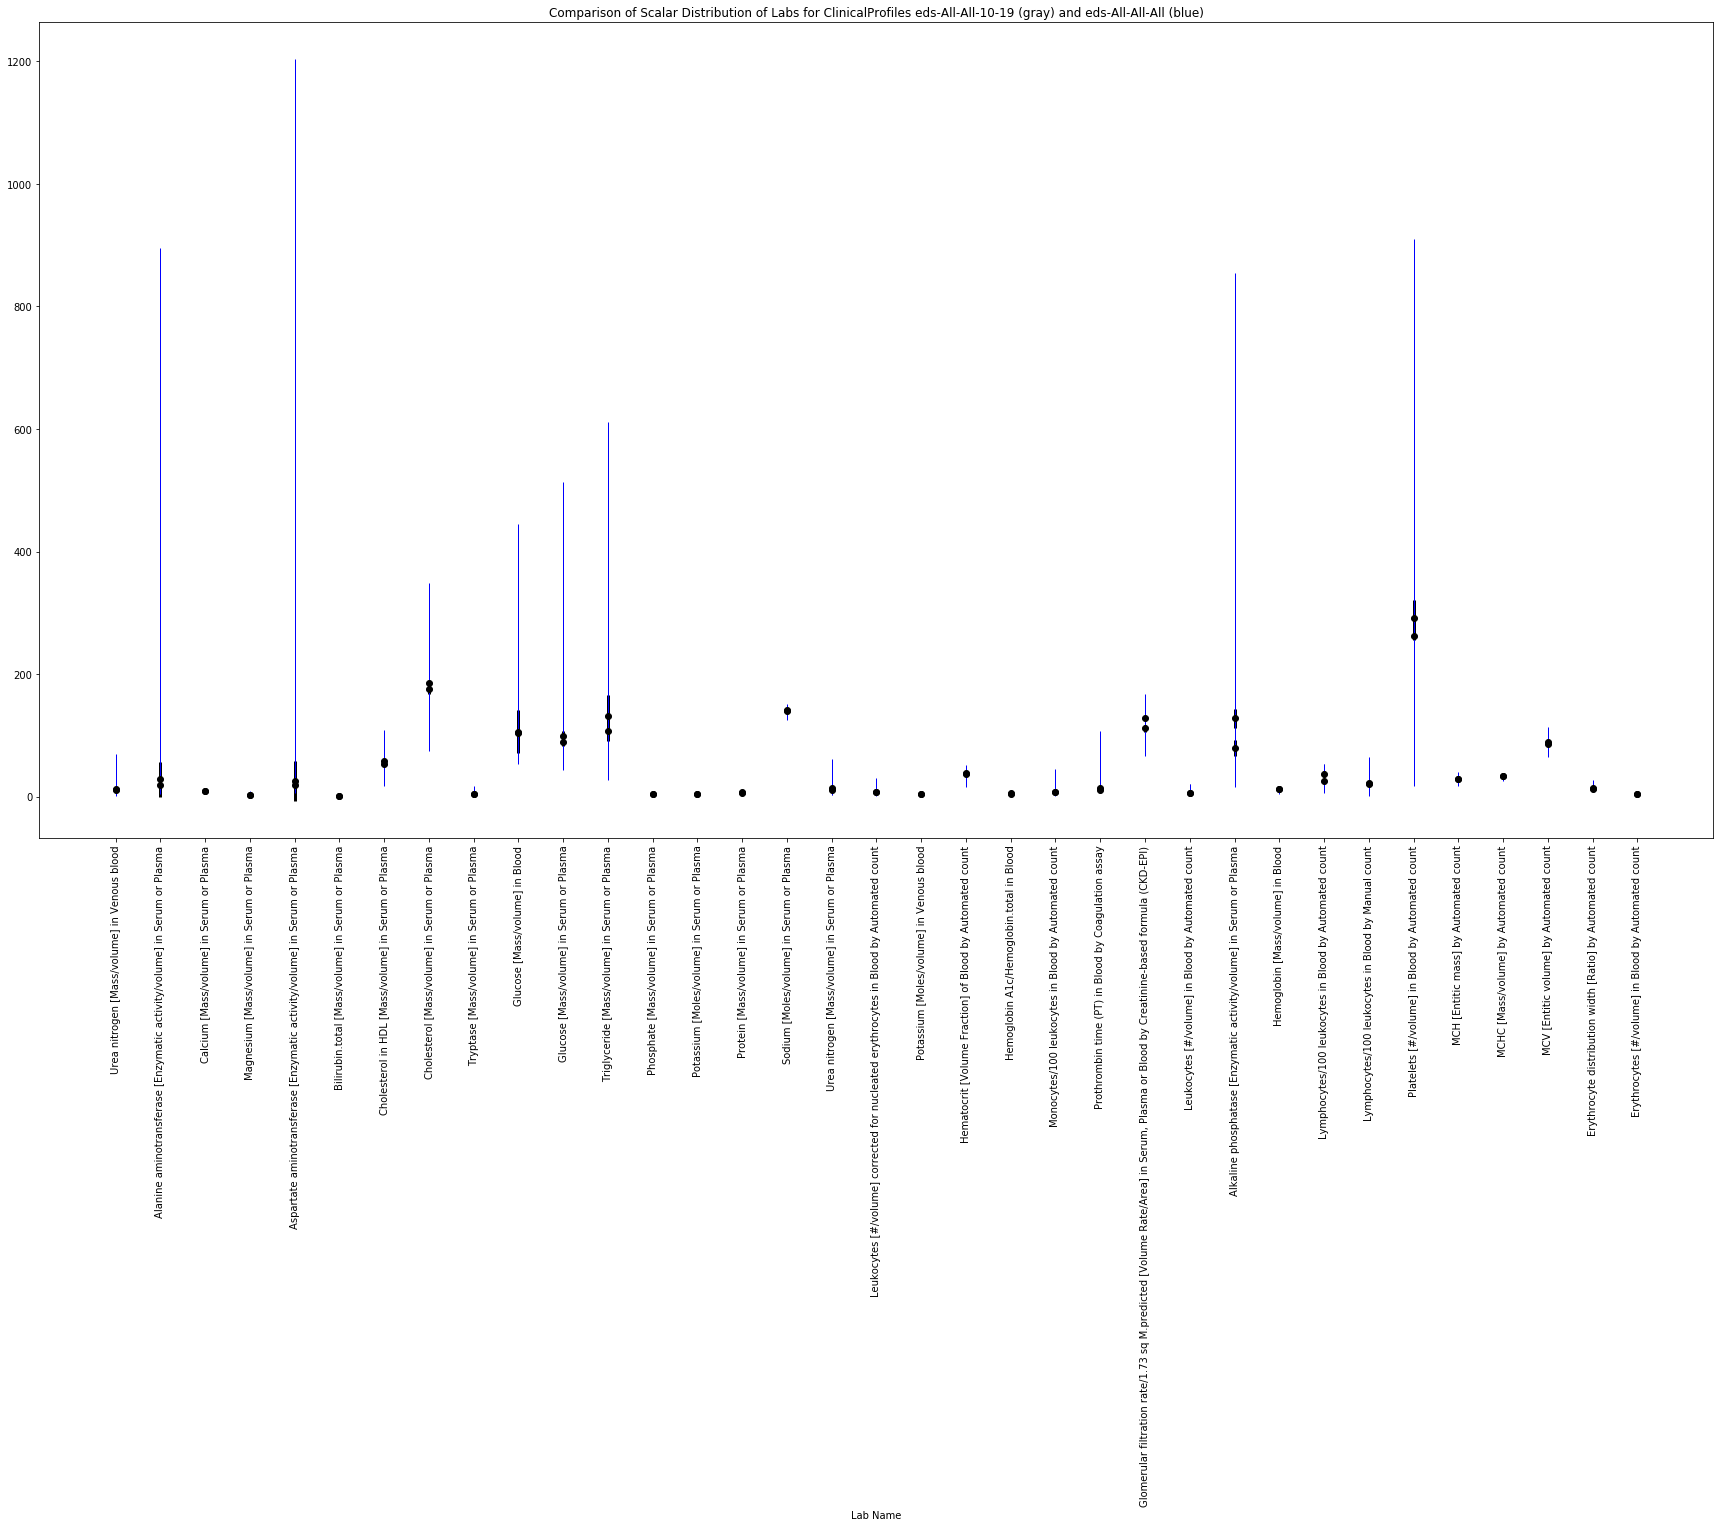

In [13]:
plt.figure(figsize=(30, 15))
plt.errorbar(np.arange(len(df4['lab_code'])), df4['mean'], df4['stdDev'], fmt='ok', lw=3)
plt.errorbar(np.arange(len(df4['lab_code'])), df4['mean'], [df4['mean'] - df4['min'], df4['max'] - df4['mean']],
             fmt='.k', ecolor='gray', lw=1)
plt.xlabel('Lab Name')
plt.errorbar(np.arange(len(df4['lab_code'])), df4['mean_base'], df4['stdDev_base'], fmt='ok', lw=3)
plt.errorbar(np.arange(len(df4['lab_code'])), df4['mean_base'], [df4['mean_base'] - df4['min_base'], df4['max_base'] - df4['mean_base']],
             fmt='.k', ecolor='blue', lw=1)
plt.xticks(np.arange(len(df4['lab_name'])), df4['lab_name'], rotation=90)
plt.title('Comparison of Scalar Distribution of Labs for ClinicalProfiles eds-All-All-10-19 (gray) and eds-All-All-All (blue)')